
#http://utahavalanchecenter.org/alta-monthly-snowfall
a = csvread('../data/alta_snow.csv');
yr = a(:,1);
b = a(:,2:7) * 2.54;
tot = a(:,8)*2.54;
ny = length(tot);
%bp has the rows and columns flipped
% rows are now all the years
% columns are the months and year total
bp = b';
%create accumulations for each month of each year
%handle the november totals
bc(1,:)=bp(1,:);
bc_max(1) = max(bc(1,1:ny-1));
bc_min(1) = min(bc(1,1:ny-1));
bc_med(1) = median(bc(1,1:ny-1));

%loop over all the other months in a season
for i=1:5
  %compute the cumulative totals each month
  bc(i+1,:)=bc(i,:)+bp(i+1,:);
  bc_max(i+1) = max(bc(i+1,1:ny-1));
  bc_min(i+1) = min(bc(i+1,1:ny-1));
  bc_med(i+1) = median(bc(i+1,1:ny-1));
  %compute the increments for each month
  d_max(i+1) = max(bc(i+1,1:ny-1)-bc(i,1:ny-1));
  d_med(i+1) = median(bc(i+1,1:ny-1)-bc(i,1:ny-1));
  d_min(i+1) = min(bc(i+1,1:ny-1)-bc(i,1:ny-1));
end
figure(1)
bar(yr,tot)
axis([yr(1) yr(length(yr)) 400 2000])
xlabel('year')
ylabel('Alta seasonal snowfall total (cm)')

%plot the monthly totals separately for each season
figure2 = figure
axes1 = axes('Parent',figure2,...
    'XTickLabel',{'Dec1','Jan1','Feb1','Mar1','Apr1','May1'},...
    'XTick',[1 2 3 4 5 6],'FontSize',14);
box(axes1,'on');
hold(axes1,'all');
ylabel('Alta snowfall Accumulation (cm)','FontSize',14);
plot(bc,'Parent',axes1)
hold on
plot(bc(:,length(yr)),'k','LineWidth',4,'Parent',axes1);

%plot what might happen if highest, typical, and lowest snowfall took place
figure3 = figure
axes3 = axes('Parent',figure3,...
    'XTickLabel',{'Dec1','Jan1','Feb1','Mar1','Apr1','May1'},...
    'XTick',[1 2 3 4 5 6],'FontSize',14);
box(axes3,'on');
hold(axes3,'all');
ylabel('Alta snowfall Accumulation (cm)','FontSize',14);
%max  each month
plot(bc_max,'r','Linewidth',2,'Parent',axes3)
hold on
%median  each month
plot(bc_med,'g','LineWidth',2,'Parent',axes3);
%smallest each month
plot(bc_min,'b','LineWidth',2,'Parent',axes3);
%2018-19 season
plot(bc(:,length(yr)),'k','LineWidth',4,'Parent',axes3);

%what might happen
yr_med = median(tot)
%start from feb1 values
feb1 = bc(3,:);
feb1_med = feb1;
%get the difference observed between the end of the season and feb1
mymfb = tot - feb1';

%find the years that have  similar total up to feb 1 compared to this one within 50 cm
syr = find(abs(feb1(ny)-feb1(1:ny-1))<50);
%get their median values
syr_feb1_med = median(feb1(syr));
%get the median values of the differences til the end of the season
syr_mymfb = median(mymfb(syr));
syr_yr = yr(syr);

syr1 = ones(1,length(syr));
sc(1:3,:) = bc(1:3,ny)*syr1;
e_max(1:3,1)=bc(1:3,ny);
e_med(1:3,1)=bc(1:3,ny);
e_min(1:3,1)=bc(1:3,ny);
for i=3:5
    %forecast how similar years have evolved that had similar amounts on
    %feb1
  sc(i+1,:)=sc(i,:)+bp(i+1,syr);
  %forecast how the rest of the year would go if the max, med, and min
  %happened each month
  e_max(i+1)=e_max(i)+d_max(i+1);
  e_med(i+1)=e_med(i)+d_med(i+1);
  e_min(i+1)=e_min(i)+d_min(i+1);
end
%forecasts based on similar years
plot(sc,'m--','LineWidth',2,'Parent',axes3)
%forecasts based on max, median, and min accumulations
plot(e_max,'r--','LineWidth',2,'Parent',axes3)
plot(e_med,'g--','LineWidth',2,'Parent',axes3)
plot(e_min,'b--','LineWidth',2,'Parent',axes3)

%keep track of when the snowfall amount is below, near, and above normal
nym = ny-1;
bct(:,:) = bc(:,1:nym)';
%define thresholds of 33 and 66% for each month
pc = prctile(bct,[33.333,66.666]);

ct = zeros(4,4,6);
%count how many times specific amounts happen relative to threshold
for i=1:5
    %this first is the joint prob that a month is below normal and the
    %season total is below normal, etc. for the rest
   ct(1,1,i) = length(find(bct(:,i)<pc(1,i)...
       &bct(:,6)<pc(1,6)));
   ct(1,2,i) = length(find(bct(:,i)>=pc(1,i)&bct(:,i)<pc(2,i)...
       &bct(:,6)<pc(1,6)));
   ct(1,3,i) = length(find(bct(:,i)>=pc(2,i)...
       &bct(:,6)<pc(1,6)));
   ct(2,1,i) = length(find(bct(:,i)<pc(1,i)...
       &bct(:,6)>=pc(1,6)&bct(:,6)<pc(2,6)));
   ct(2,2,i) = length(find(bct(:,i)>=pc(1,i)&bct(:,i)<pc(2,i)...
       &bct(:,6)>=pc(1,6)&bct(:,6)<pc(2,6)));
   ct(2,3,i) = length(find(bct(:,i)>=pc(2,i)...
       &bct(:,6)>=pc(1,6)&bct(:,6)<pc(2,6)));
   ct(3,1,i) = length(find(bct(:,i)<pc(1,i)...
       &bct(:,6)>=pc(2,6)));
   ct(3,2,i) = length(find(bct(:,i)>=pc(1,i)&bct(:,i)<pc(2,i)...
       &bct(:,6)>=pc(2,6)));
   ct(3,3,i) = length(find(bct(:,i)>=pc(2,i)...
       &bct(:,6)>=pc(2,6)));
   for j=1:3
       ct(j,4,i)= sum(ct(j,1:3,i));
       ct(4,j,i)= sum(ct(1:3,j,i));
   end
   ct(4,4,i)=sum(ct(4,1:3,i));
end

%find the years when the snow totals are in the three categories
   cb = find(bct(1:nym-1,6)<pc(1,6));
   cn = find(bct(1:nym-1,6)>=pc(1,6)&bct(1:nym-1,6)<pc(2,6));
   ca = find(bct(1:nym-1,6)>=pc(2,6));
   ct(1,1,6) = length(find(bct(cb+1,6)<pc(1,6)));   
   ct(1,2,6) = length(find(bct(cn+1,6)<pc(1,6)));
   ct(1,3,6) = length(find(bct(ca+1,6)<pc(1,6)));
   ct(2,1,6) = length(find(bct(cb+1,6)>=pc(1,6)&bct(cb+1,6)<pc(2,6)));
   ct(2,2,6) = length(find(bct(cn+1,6)>=pc(1,6)&bct(cn+1,6)<pc(2,6)));
   ct(2,3,6) = length(find(bct(ca+1,6)>=pc(1,6)&bct(ca+1,6)<pc(2,6)));
   ct(3,1,6) = length(find(bct(cb+1,6)>=pc(2,6)));   
   ct(3,2,6) = length(find(bct(cn+1,6)>=pc(2,6)));
   ct(3,3,6) = length(find(bct(ca+1,6)>=pc(2,6)));
   %accumulate them into separate tables for each case
   for j=1:3
       ct(j,4,6)= sum(ct(j,1:3,6));
       ct(4,j,6)= sum(ct(1:3,j,6));
   end
   %sum of the marginal totals over all the years
   ct(4,4,6)=sum(ct(4,1:3,6));

In [65]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
import matplotlib.pyplot as plt
from datetime import datetime

In [90]:
a = np.genfromtxt('../data/alta_snow.csv',delimiter=',')
#convert to cm
a[:,1:8]=2.54*a[:,1:8]
print(a)
#ny is number of years
ny = len(a)
print(ny)

[[1946.     276.86   210.82   214.63   127.     175.26   140.97  1145.54 ]
 [1947.     175.26   160.02   154.94   134.62   172.72   152.4    949.96 ]
 [1948.     299.72   203.2    116.84   167.64   419.1    187.96  1394.46 ]
 [1949.     180.34   406.4    335.28   147.32   246.38    12.7   1328.42 ]
 [1950.      99.06   347.98   337.82    86.36   276.86    63.5   1211.58 ]
 [1951.     152.4    167.64   284.48   147.32   134.62     0.     886.46 ]
 [1952.     170.18   396.24   292.1    266.7    414.02    88.9   1628.14 ]
 [1953.     111.76   165.1    284.48   101.6    236.22   144.78  1043.94 ]
 [1954.     127.     271.78   137.16   144.78   256.54    35.56   972.82 ]
 [1955.      93.98   134.62   340.36   327.66   152.4    149.86  1198.88 ]
 [1956.     218.44   284.48   261.62   182.88    83.82   137.16  1168.4  ]
 [1957.      91.44   127.     218.44   104.14   246.38   193.04   980.44 ]
 [1958.     187.96   201.93   212.09   334.01   203.2    281.94  1421.13 ]
 [1959.      96.52   120.

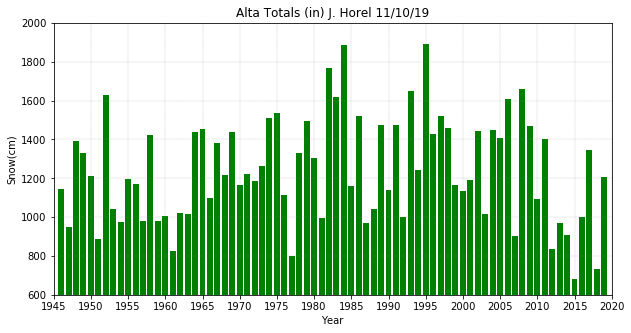

In [88]:
halfdecade_ticks = np.arange(1945,2025,5)
fig,(ax1) = plt.subplots(1,1,figsize=(10,5))
ax1.bar(a[:,0],a[:,7],color='green')
ax1.set(xlim=(1945,2019),ylim=(600,2000))
ax1.set(xlabel="Year",ylabel='Snow(cm)')
ax1.set(xticks=halfdecade_ticks)
ax1.set(title="Alta Totals (in) J. Horel 11/10/19")
ax1.grid(linestyle='--', color='grey', linewidth=.2)

plt.savefig('alta_totals_python.png')

In [92]:
#af is the transpose (switched columns and rows)
af= a.T
print(af)

[[1946.    1947.    1948.    1949.    1950.    1951.    1952.    1953.
  1954.    1955.    1956.    1957.    1958.    1959.    1960.    1961.
  1962.    1963.    1964.    1965.    1966.    1967.    1968.    1969.
  1970.    1971.    1972.    1973.    1974.    1975.    1976.    1977.
  1978.    1979.    1980.    1981.    1982.    1983.    1984.    1985.
  1986.    1987.    1988.    1989.    1990.    1991.    1992.    1993.
  1994.    1995.    1996.    1997.    1998.    1999.    2000.    2001.
  2002.    2003.    2004.    2005.    2006.    2007.    2008.    2009.
  2010.    2011.    2012.    2013.    2014.    2015.    2016.    2017.
  2018.    2019.   ]
 [ 276.86   175.26   299.72   180.34    99.06   152.4    170.18   111.76
   127.      93.98   218.44    91.44   187.96    96.52    55.88   190.5
   116.84    78.74   139.7    241.3    175.26   134.62    55.88   222.25
   142.24   200.66   163.83     0.     230.886   64.77   238.76    34.29
   134.62   158.75   201.93   101.6    119.38   1

In [123]:
#create accumulations for each month of each year
#handle the november totals
ac=np.zeros((6,ny))
ac_max=np.zeros(6)
ac_min=np.zeros(6)
ac_med=np.zeros(6)
ac[0,:]=af[1,:]
ac_max[0] = np.max(ac[0,0:ny+1])
ac_min[0] = np.min(ac[0,0:ny+1])
ac_med[0] = np.median(ac[0,0:ny+1])
print(ac_max[0],ac_med[0],ac_min[0])

522.986 159.00400000000002 0.0


In [122]:
#loop over all the other months in a season
for i in range(6):
    #compute the cumulative totals each month
    print(i)
    ac[i+1,:]=ac[i,:]+af[i+1,:]
    ac_max[i+1] = np.max(ac[i+1,0:ny]);
    ac_min[i+1] = np.min(ac[i+1,0:ny]);
    ac_med[i+1] = np.median(ac[i+1,0:ny]);
#  %compute the increments for each month
#  d_max(i+1) = max(bc(i+1,1:ny-1)-bc(i,1:ny-1));
#  d_med(i+1) = median(bc(i+1,1:ny-1)-bc(i,1:ny-1));
#  d_min(i+1) = min(bc(i+1,1:ny-1)-bc(i,1:ny-1));


0
1
2
3
4
5


IndexError: index 6 is out of bounds for axis 0 with size 6